In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [39]:
data = pd.DataFrame({
    'Name':[chr(i) for i in range(65, 120)] + [2*chr(i) for i in range(65, 120)],
    'Age': np.random.randint(20,40,110),
    'Height': np.random.randint(155,200,110),
    'Gender': [['Male', 'Female'][np.random.randint(2)] for i in range(110)],
    'Team': [['Red', 'Blue', 'Black', 'Yellow', 'Green'][np.random.randint(5)] for i in range(110)],
    'Participation': np.random.randint(0,6,110)
})

data['Experience'] = data['Age'] - 15 + np.random.randint(0,5,110)
data['Score'] = np.round(data['Age'] * data['Experience'] * (2*data['Participation']) /150 + np.random.randint(10,25,110),2)
data.head()

,Name,Age,Height,Gender,Team,Participation,Experience,Score
0,A,33,199,Female,Green,1,18,21.92
1,B,27,158,Male,Blue,3,12,22.96
2,C,34,180,Female,Green,1,23,20.43
3,D,36,159,Female,Black,0,23,20.00
4,E,32,160,Male,Blue,0,20,18.00


# Encoding

## Label Encoding

In [4]:
label_encoder = LabelEncoder()
label_encoder.fit(data['Team'])

LabelEncoder()

In [5]:
label_encoder.transform(data['Team'])

array([4, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 4, 0, 0, 2, 2, 3, 3, 0,
       0, 4, 1, 3, 3, 2, 2, 1, 4, 0, 4, 3, 1, 4, 2, 0, 3, 4, 2, 4, 1, 3,
       3, 4, 4, 3, 0, 3, 0, 1, 1, 0, 1, 1, 4, 2, 0, 0, 2, 1, 3, 4, 3, 0,
       3, 0, 1, 3, 3, 2, 3, 4, 3, 2, 4, 0, 4, 1, 3, 1, 4, 0, 0, 3, 0, 4,
       2, 1, 2, 1, 4, 3, 0, 0, 4, 3, 0, 4, 3, 1, 4, 2, 3, 4, 1, 0, 3, 4])

In [6]:
data['Team_Label'] = label_encoder.transform(data['Team'])

In [7]:
data.head()

,Name,Age,Height,Gender,Team,Participation,Experience,Score,Team_Label
0,A,37,194,Male,Yellow,0,24,15.00,4
1,B,30,161,Female,Green,1,15,19.00,2
2,C,30,173,Female,Green,0,16,15.00,2
3,D,36,167,Male,Black,3,24,57.56,0
4,E,38,197,Male,Green,1,26,27.17,2


## One Hot Encoding

In [9]:
one_hot = OneHotEncoder(sparse_output=False)
one_hot.fit(data[['Gender']])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [10]:
one_hot.transform(data[['Gender']])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [24]:
one_hot.categories_[0]

array(['Female', 'Male'], dtype=object)

In [20]:
one_hot_df = pd.DataFrame(one_hot.transform(data[['Gender']]), columns = one_hot.categories_)
one_hot_df

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
105,0.0,1.0
106,0.0,1.0
107,1.0,0.0
108,1.0,0.0


In [21]:
data[one_hot_df.columns] = one_hot.transform(data[['Gender']])

In [37]:
data[one_hot.categories_[0]]  = one_hot.transform(data[['Gender']])
data.head()

,Name,Age,Height,Gender,Team,Participation,Experience,Score,Team_Label,Female,Male
0,A,37,194,Male,Yellow,0,24,15.00,4,0.0,1.0
1,B,30,161,Female,Green,1,15,19.00,2,1.0,0.0
2,C,30,173,Female,Green,0,16,15.00,2,1.0,0.0
3,D,36,167,Male,Black,3,24,57.56,0,0.0,1.0
4,E,38,197,Male,Green,1,26,27.17,2,0.0,1.0


# Transformation

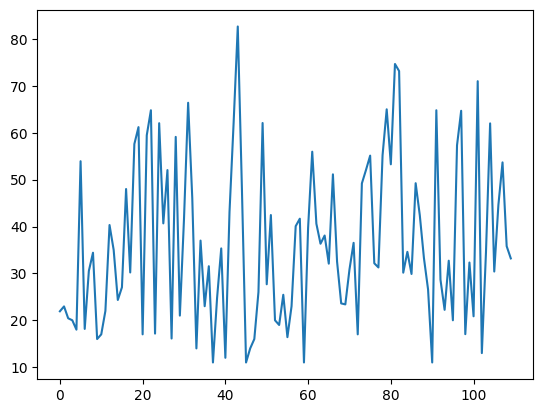

In [40]:
plt.plot(data['Score'])

## Normalization

Normalization, also known as min-max scaling is a method where data values are adjusted and scaled to fall within a range of 0 to 1.  
This technique maintains the original distribution of values without altering their ranges. 

In [42]:
minmax = MinMaxScaler()
minmax.fit(data[['Score']])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [43]:
minmax.transform(data[['Score']])

array([[0.15236501],
       [0.16687596],
       [0.13157528],
       [0.12557555],
       [0.09766988],
       [0.5989954 ],
       [0.09990233],
       [0.27249895],
       [0.32663597],
       [0.0697642 ],
       [0.08371704],
       [0.15348123],
       [0.40909725],
       [0.33486815],
       [0.18599135],
       [0.22380354],
       [0.51625506],
       [0.26789452],
       [0.65020232],
       [0.70043254],
       [0.08371704],
       [0.67643365],
       [0.75066276],
       [0.08594949],
       [0.71215292],
       [0.41398075],
       [0.57262453],
       [0.07129901],
       [0.67141063],
       [0.13952839],
       [0.42695689],
       [0.7729873 ],
       [0.48932608],
       [0.04185852],
       [0.36277382],
       [0.16743407],
       [0.28645179],
       [0.        ],
       [0.19254918],
       [0.33947258],
       [0.01395284],
       [0.44746756],
       [0.71438538],
       [1.        ],
       [0.51723176],
       [0.        ],
       [0.04185852],
       [0.069

In [44]:
data['Score_Norm'] = minmax.transform(data[['Score']])

data.head()

,Name,Age,Height,Gender,Team,Participation,Experience,Score,Score_Norm
0,A,33,199,Female,Green,1,18,21.92,0.152365
1,B,27,158,Male,Blue,3,12,22.96,0.166876
2,C,34,180,Female,Green,1,23,20.43,0.131575
3,D,36,159,Female,Black,0,23,20.00,0.125576
4,E,32,160,Male,Blue,0,20,18.00,0.097670


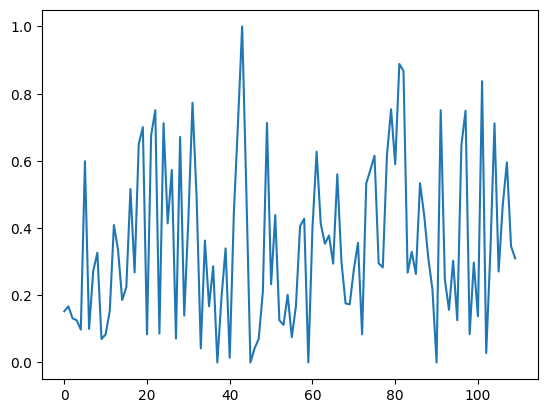

In [45]:
plt.plot(data['Score_Norm'])

## Standardization

Standardization is a technique that re-scales data so that it has a mean value of zero and a standard deviation of one. This effectively normalizes the distribution of the data. 

Keep in mind that in machine learning, not every data set necessitates normalization. It's only required when the features within the data set have varying ranges.

In [49]:
scaler = scale(data[['Score']])
scaler

array([[-8.37462591e-01],
       [-7.77084006e-01],
       [-9.23966526e-01],
       [-9.48930749e-01],
       [-1.06504341e+00],
       [ 1.02092060e+00],
       [-1.05575440e+00],
       [-3.37597571e-01],
       [-1.12339003e-01],
       [-1.18115608e+00],
       [-1.12309975e+00],
       [-8.32818085e-01],
       [ 2.30773920e-01],
       [-7.80857667e-02],
       [-6.97546831e-01],
       [-5.40214171e-01],
       [ 6.76646551e-01],
       [-3.56756161e-01],
       [ 1.23398734e+00],
       [ 1.44299014e+00],
       [-1.12309975e+00],
       [ 1.34313324e+00],
       [ 1.65199293e+00],
       [-1.11381073e+00],
       [ 1.49175745e+00],
       [ 2.51093636e-01],
       [ 9.11194133e-01],
       [-1.17476988e+00],
       [ 1.32223296e+00],
       [-8.90874417e-01],
       [ 3.05086025e-01],
       [ 1.74488306e+00],
       [ 5.64597830e-01],
       [-1.29726874e+00],
       [ 3.80268976e-02],
       [-7.74761752e-01],
       [-2.79541239e-01],
       [-1.47143774e+00],
       [-6.7

In [50]:
data['Score_Stand'] = scale(data[['Score']])

data.head()

,Name,Age,Height,Gender,Team,Participation,Experience,Score,Score_Norm,Score_Stand
0,A,33,199,Female,Green,1,18,21.92,0.152365,-0.837463
1,B,27,158,Male,Blue,3,12,22.96,0.166876,-0.777084
2,C,34,180,Female,Green,1,23,20.43,0.131575,-0.923967
3,D,36,159,Female,Black,0,23,20.00,0.125576,-0.948931
4,E,32,160,Male,Blue,0,20,18.00,0.097670,-1.065043


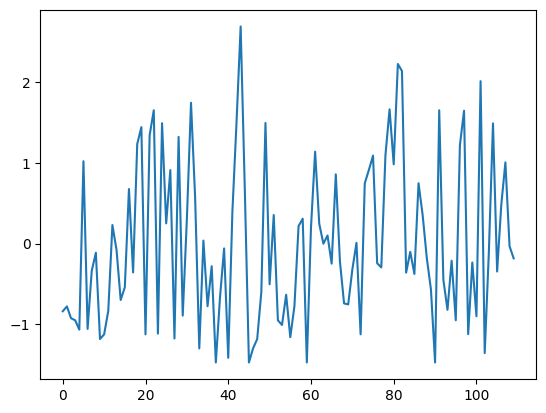

In [51]:
plt.plot(data['Score_Stand'])

In [ ]:
data[['Score', 'Score_Norm', 'Score_Stand']]

,Score,Score_Norm,Score_Stand
0,21.92,0.152365,-0.837463
1,22.96,0.166876,-0.777084
2,20.43,0.131575,-0.923967
3,20.00,0.125576,-0.948931
4,18.00,0.097670,-1.065043
...,...,...,...
105,30.40,0.270685,-0.345145
106,44.60,0.468815,0.479255
107,53.68,0.595507,1.006407
108,35.80,0.346030,-0.031641


In [53]:
data[['Score', 'Score_Norm', 'Score_Stand']].describe()

,Score,Score_Norm,Score_Stand
count,110.000000,110.000000,1.100000e+02
mean,36.345000,0.353635,-3.434122e-16
std,17.303482,0.241433,1.004577e+00
min,11.000000,0.000000,-1.471438e+00
25%,22.057500,0.154284,-8.294798e-01
50%,32.955000,0.306335,-1.968110e-01
75%,49.230000,0.533417,7.480558e-01
max,82.670000,1.000000,2.689460e+00


# A

## Data Loading

In [ ]:
iris = sk.datasets.load_iris()

x = iris.data
y = iris.target

feature_names = iris.feature_names.append('Target')
target_names = iris.target_names

In [ ]:
df = pd.DataFrame(np.insert(x,x.shape[-1], y, axis=1),
                  columns= feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df['Target'] = df['Target'].apply( lambda x : list(target_names)[int(x)])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
df['Target'].unique()

array([np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')],
      dtype=object)

In [49]:
X = df.drop('Target', axis=1)
y = df['Target']

## Train Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0 )


print(f'X Train Shape:{X_train.shape}\n',
f'X Test Shape:{X_test.shape}\n',
f'y Train Shape:{y_train.shape}\n',
f'y Test Shape:{y_test.shape}\n')

X Train Shape:(112, 4)
 X Test Shape:(38, 4)
 y Train Shape:(112,)
 y Test Shape:(38,)



## Training Decision Tree

In [54]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
y_pred = clf.predict(X_test)
y_pred

array([np.str_('virginica'), np.str_('versicolor'), np.str_('setosa'),
       np.str_('virginica'), np.str_('setosa'), np.str_('virginica'),
       np.str_('setosa'), np.str_('versicolor'), np.str_('versicolor'),
       np.str_('versicolor'), np.str_('virginica'), np.str_('versicolor'),
       np.str_('versicolor'), np.str_('versicolor'),
       np.str_('versicolor'), np.str_('setosa'), np.str_('versicolor'),
       np.str_('versicolor'), np.str_('setosa'), np.str_('setosa'),
       np.str_('virginica'), np.str_('versicolor'), np.str_('setosa'),
       np.str_('setosa'), np.str_('virginica'), np.str_('setosa'),
       np.str_('setosa'), np.str_('versicolor'), np.str_('versicolor'),
       np.str_('setosa'), np.str_('virginica'), np.str_('versicolor'),
       np.str_('setosa'), np.str_('virginica'), np.str_('virginica'),
       np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')],
      dtype=object)

In [57]:
acc = metrics.accuracy_score(y_test, y_pred)

In [61]:
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.97
